# K-Means Clustering

This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

## Basics of K-means clustering

K means runs significantly faster on large datasets.

```python
kmeans(obs, k_or_guess, iter, thresh, check_finite)
```

* obs: standardized observations using `whiten` method
* k_or_guess: number of clusters
* iter: number of iterations(default:20)
* thres: threshold if change in distursion since the last k means is <= threshold (default: 1e-05=0.00001)
* check_finite: whether to check if observations contain only finite numbers(default=True) thus no infinite or NaN values if True.


Returns 2  cluster centers and distortion.

The mean of the list of distortions from the vq method should approximately equal the distortion value of the kmeans method if the same list of observations is passed.

## K-means clustering: first exercise

This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

* Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
* Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten

In [3]:
x_coordinate=[17,
 20,
 35,
 14,
 37,
 33,
 14,
 30,
 35,
 17,
 11,
 21,
 13,
 10,
 81,
 84,
 87,
 83,
 90,
 97,
 94,
 88,
 89,
 93,
 92,
 82,
 81,
 92,
 91,
 22,
 23,
 25,
 25,
 27,
 17,
 17]
y_coordinate= [4,
 6,
 0,
 0,
 4,
 3,
 1,
 6,
 5,
 4,
 6,
 10,
 8,
 10,
 97,
 94,
 99,
 95,
 95,
 97,
 99,
 99,
 94,
 99,
 90,
 98,
 100,
 93,
 98,
 15,
 10,
 0,
 10,
 7,
 17,
 15]

In [4]:
comic_con=pd.DataFrame({'x_coordinate':x_coordinate,'y_coordinate':y_coordinate})
# Use the whiten() function to standardize the data
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.shape

(36, 4)

**Instructions**

* Import kmeans and vq functions in SciPy.
* Generate cluster centers using the kmeans() function with two clusters.
* Create cluster labels using these cluster centers.

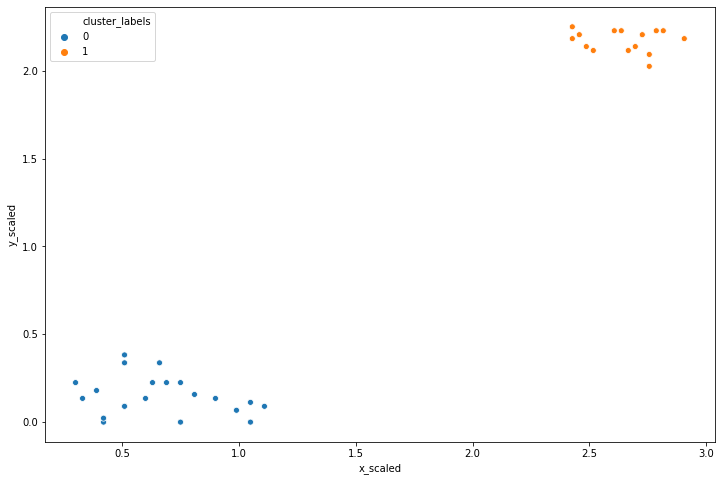

In [7]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

fig=plt.figure(figsize=(12,8))
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [8]:
comic_con.dtypes

x_coordinate        int64
y_coordinate        int64
x_scaled          float64
y_scaled          float64
cluster_labels      int32
dtype: object

Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.

In [9]:
import timeit

fifa=pd.read_csv("fifa_18_dataset.csv")
fifa=fifa[0:5000]
fifa['scaled_sliding_tackle']= np.round(whiten(fifa['sliding_tackle']),2)
fifa['scaled_aggression']= np.round(whiten(fifa['aggression'],2),2)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.97,3.72
1,26,48,1.09,2.84
2,33,56,1.39,3.31
3,38,78,1.60,4.61
4,11,29,0.46,1.71


In [10]:
%timeit kmeans(fifa[['scaled_sliding_tackle','scaled_aggression']],3)

167 ms ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


On this system, It took 167 milliseconds (0.167 sec) to run Kmeans, but took more time 2 sec to run hierarchical clustering.

## How many clusters?

* Distortion: sum of squared distances of
points from cluster centers

using elbow method, average silhouette and gap statistics

### Elbow method on distinct clusters

Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Instructions**

* Create a list of distortions for each cluster in num_clusters.
* Create a data frame elbow_plot with num_clusters and distortions.
* With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

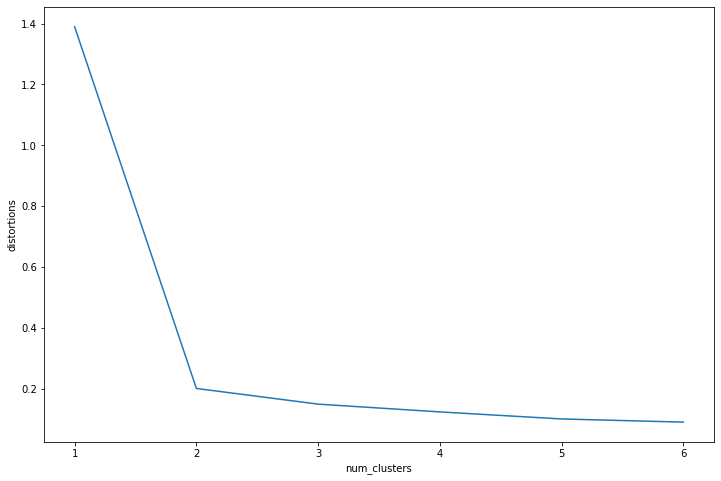

In [12]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

fig=plt.figure(figsize=(12,8))

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

This shows 2 clusters in the data.

## Elbow method on uniform data

In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

The data is stored in a Pandas data frame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

In [13]:
x_coordinate=[39,
 42,
 58,
 43,
 13,
 32,
 60,
 13,
 26,
 27,
 29,
 51,
 14,
 50,
 62,
 59,
 50,
 62,
 65,
 17,
 25,
 45,
 55,
 48,
 42,
 58,
 68,
 58,
 37,
 55]

y_coordinate=[3,
 7,
 3,
 3,
 6,
 5,
 3,
 4,
 0,
 9,
 6,
 3,
 0,
 7,
 4,
 1,
 3,
 0,
 2,
 5,
 9,
 5,
 8,
 6,
 3,
 1,
 4,
 2,
 8,
 7]

In [14]:
uniform_data=pd.DataFrame({'x_coordinate':x_coordinate,'y_coordinate':y_coordinate})
uniform_data['x_scaled']=whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled']=whiten(uniform_data['y_coordinate'])
uniform_data.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39,3,2.376199,1.152237
1,42,7,2.558984,2.688554
2,58,3,3.533835,1.152237
3,43,3,2.619912,1.152237
4,13,6,0.792066,2.304475


**Instructions**

* Create a list of distortions for each cluster in num_clusters.
* Create a data frame elbow_plot with num_clusters and distortions.
* With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

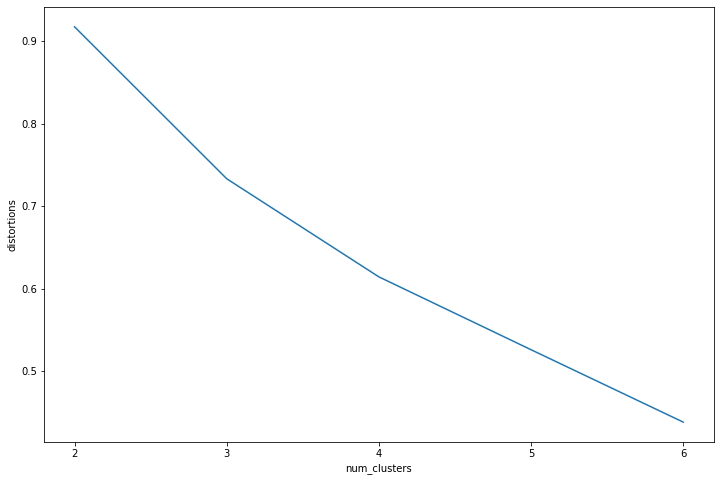

In [16]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})


fig=plt.figure(figsize=(12,8))
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

There is no well defined elbow in this plot!

## Limitations of k-means clustering

* how to find k
* impact of seeds,
* formation of equal sized clusters

Clustering is still an Exploratory stage of analysis. 

### Impact of seeds on distinct clusters

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Instructions**

* Import the random class from numpy and initialize the seed with the integer 0.

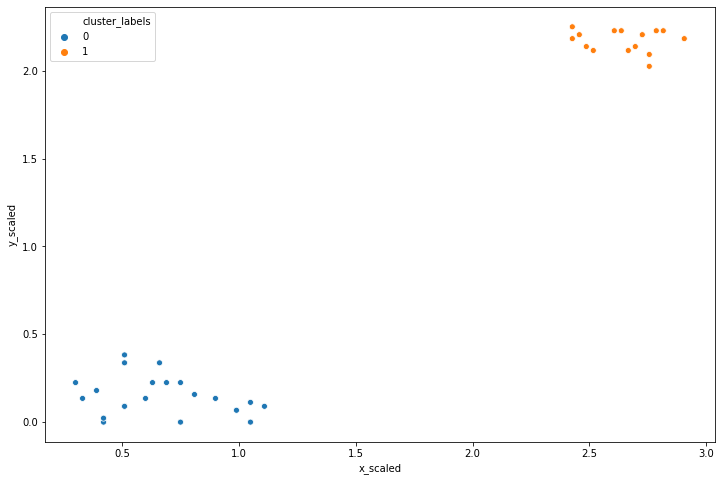

In [19]:
# Import random class
from numpy  import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

fig=plt.figure(figsize=(12,8))

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

* Change your code from the earlier step so that the seed is initialized with a list [1, 2, 1000].

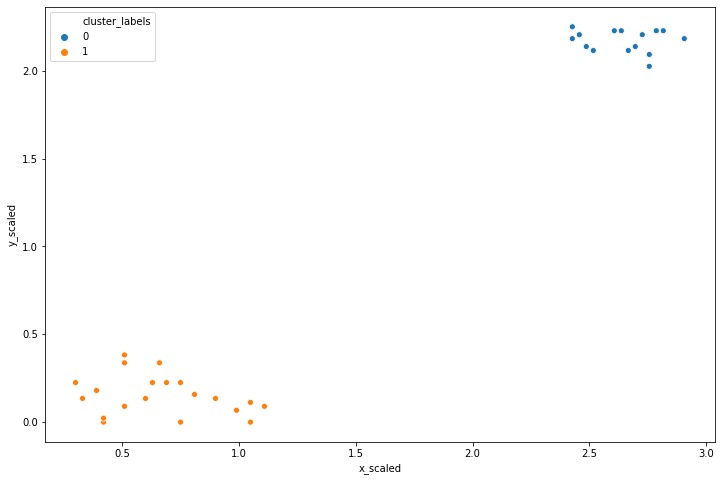

In [21]:
# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

fig=plt.figure(figsize=(12,8))
# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Notice that the plots have not changed after changing the seed as the clusters are well-defined.

### Uniform clustering patterns

Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

The data is stored in a Pandas data frame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.

In [23]:
x_coordinate=[33.875528010208775,
 38.208747889149606,
 35.740587879668375,
 32.54696342954206,
 62.06314582832662,
 53.769683890896005,
 32.49035021952977,
 55.3252017626829,
 68.10254176198403,
 53.283123547122216,
 67.71803005072717,
 32.845502853646536,
 61.78083409365266,
 62.072467329911454,
 37.2423104965403,
 48.39279681160971,
 35.48978845302275,
 65.60854565818534,
 38.02888393506392,
 65.49367503080025,
 41.60372438786939,
 48.41398475297436,
 41.81966990296046,
 51.769182700772454,
 45.179950587632945,
 38.02218596797351,
 56.37185205882892,
 52.05250382127925,
 44.24373638076516,
 40.33281190433085,
 53.59657550320356,
 45.872652957168775,
 54.000011702824835,
 52.6886879008935,
 53.25422917515853,
 63.54212627168273,
 65.38884629108937,
 49.7331204244559,
 48.58080531427996,
 48.03000662249777,
 44.667125096576456,
 65.30935895573465,
 40.58584806552085,
 43.935337781568315,
 32.873749638659994,
 43.17638645624066,
 61.44735547191348,
 47.902126357633676,
 47.572750544262746,
 50.65221646915222,
 45.446521013813914,
 48.17757170967687,
 50.11893027842959,
 37.33082580526986,
 53.28605844737083,
 32.606017427486364,
 46.59545711595761,
 54.91413224060491,
 61.18758173081231,
 62.25623799525337,
 47.807103448547345,
 65.44265167099898,
 36.17446484734976,
 60.90339817677179,
 44.238116884086224,
 40.34232188761509,
 57.1991023845528,
 36.08806304674293,
 35.56663866798864,
 42.41968176650849,
 59.65269146405017,
 32.624629292084094,
 55.802169917560185,
 65.49918670396143,
 45.54670963865595,
 61.005369016634205,
 58.19939103997329,
 63.119317713784035,
 55.317083131439325,
 45.609472159593864,
 45.63141644596187,
 46.74818574516722,
 68.2835242879107,
 61.96714674680341,
 48.961046192567,
 45.37856387981091,
 50.841168640885435,
 52.56595620799083,
 39.13493120568782,
 48.991763726168436,
 58.05200857676577,
 41.37122590593515,
 64.3514005533457,
 35.02226785177038,
 48.60847434578881,
 42.6486493170514,
 57.584951487904185,
 49.08107020583896,
 51.426592405160875,
 62.315517190744416,
 26.840752816458078,
 26.951941203374947,
 32.5621398164603,
 27.108845406070458,
 20.77972887648475,
 34.64864231015485,
 27.334714397277274,
 38.63528805644043,
 27.362780877847065,
 22.25173068139633,
 23.561817911734813,
 28.6834020635391,
 33.84077612867423,
 28.223160262959322,
 38.08583937546411,
 29.88562783705242,
 28.408504942406417,
 31.72078699025845,
 25.21073980042423,
 28.676889274075087,
 32.248620751649284,
 26.387527137544257,
 28.699010037068682,
 26.075497431739343,
 34.287109826660135,
 24.026824037174762,
 30.83187786615126,
 32.37571558869186,
 22.76230802134732,
 35.251223510448035,
 70.1823912319945,
 79.58988481728986,
 65.72716493320895,
 68.48339899780753,
 76.4135846784469,
 79.26874522519233,
 64.84182258980695,
 71.11774101770646,
 78.34020407876903,
 63.61846310591197,
 67.53968320798616,
 69.1508780470645,
 67.79213380348288,
 76.87140430526,
 62.00437158352073,
 67.49125960815724,
 71.90747912630009,
 65.27576084118527,
 77.58529514762616,
 79.66066417912315,
 77.32463519764799,
 68.5790017971886,
 65.9764957476465,
 71.55575552204994,
 69.83671682593541,
 70.4943218813415,
 72.62743438217248,
 67.66970193136962,
 63.44559188910216,
 75.45783601312209]

y_coordinate=[44.89342094946078,
 41.11632695012222,
 57.41800587821296,
 57.21808248658115,
 47.19694447881652,
 35.9519591663506,
 42.0218536061098,
 52.548322206341886,
 52.31212455866878,
 31.63628689308561,
 47.605248069586594,
 54.23496141308666,
 60.824987602248825,
 65.23558661122223,
 48.237577085508796,
 67.52456486435298,
 54.10211413900534,
 51.8513512002574,
 39.82817720810414,
 44.28386899368546,
 60.21348801168716,
 45.355137861258946,
 35.81066078526795,
 56.95992181229278,
 61.05673695261803,
 44.34557019681759,
 49.53371077686823,
 57.76601797690635,
 41.7427565034216,
 52.07742896956642,
 55.58701182345966,
 43.81629666563168,
 61.46690780645113,
 44.3775923583563,
 44.722751130263774,
 47.98225455002846,
 47.73690085784043,
 46.049823776856826,
 56.78708412569725,
 56.60380297058407,
 61.716042124809185,
 56.52781556973503,
 45.81317068292476,
 49.107768819361304,
 41.14505631914088,
 64.84595736862047,
 62.46952021318698,
 58.299124711890485,
 48.533208073849394,
 48.79467674278415,
 40.65821117776538,
 30.466588286384656,
 65.1805398242621,
 41.73000679928131,
 69.24321762302908,
 56.00106984258167,
 39.63738121453994,
 38.404587085375475,
 39.63915234786564,
 38.73957077928137,
 36.00996935366802,
 45.627290421255125,
 57.17020664932346,
 51.32130044599607,
 40.89880525190646,
 41.15484687210742,
 58.21497749474327,
 43.45728537166188,
 42.722747180257315,
 39.27124659372834,
 42.66172394093738,
 57.407147546037336,
 34.25546896017839,
 61.2946118575901,
 30.513927856422505,
 65.03769516099436,
 63.378856912574534,
 62.926205725335116,
 35.88019396665801,
 52.89656062679065,
 37.259020806758414,
 31.67028002331956,
 47.16555533297543,
 50.8823970375166,
 41.77975390328266,
 49.38557057141355,
 52.58865855257825,
 40.89034885614024,
 65.91171887261399,
 46.57669291055369,
 63.5556821473357,
 45.45012239907503,
 43.705265331740556,
 46.58949706968058,
 38.91660455701806,
 55.46764508050404,
 67.89462117284727,
 36.02362380728002,
 59.985360625320176,
 54.70049854246623,
 82.72356822426191,
 77.9444363345605,
 75.40050306769567,
 68.91634077469779,
 72.84274950158657,
 74.71747015717696,
 70.61496974587016,
 76.12679437605598,
 80.60280864557596,
 70.19696261830036,
 68.23133122814531,
 83.83579386727436,
 83.97371742515891,
 70.71122298781704,
 72.22425104319395,
 79.61715461567954,
 74.81720151229194,
 81.28549433293101,
 79.839476126322,
 82.54505219682139,
 72.41216493735487,
 74.60395650171206,
 68.84261456484317,
 73.28936759848196,
 80.51600556553831,
 82.6396572856646,
 66.38754731793188,
 73.35737436223333,
 72.53759838415348,
 73.71960774659767,
 78.16166533096742,
 75.99349930565272,
 67.237386284613,
 82.50606008627572,
 77.72556254117448,
 73.68057342677461,
 83.33967752728628,
 84.67897397759208,
 71.78110971610965,
 68.1659101899457,
 83.8792565462558,
 74.22367681669748,
 78.1526834527262,
 74.21207006805605,
 75.13106435618263,
 77.71960453281291,
 71.08256275442666,
 74.66344797163669,
 80.35559980446331,
 73.34017066404198,
 70.12614603304121,
 77.46797550765935,
 77.65232497035855,
 76.70948616089562,
 73.94355101042667,
 71.19864360817556,
 76.4341868745873,
 70.62890953003463,
 78.5744388997699,
 68.4489350236011]

In [24]:
mouse=pd.DataFrame({'x_coordinate':x_coordinate,'y_coordinate':y_coordinate})
mouse['x_scaled']=whiten(mouse['x_coordinate'])
mouse['y_scaled']=whiten(mouse['y_coordinate'])
mouse.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,33.875528,44.893421,2.209458,2.977524
1,38.208748,41.116327,2.492083,2.727011
2,35.740588,57.418006,2.331103,3.808208
3,32.546963,57.218082,2.122806,3.794948
4,62.063146,47.196944,4.047935,3.130303


**Instructions**

* Import kmeans and vq functions in SciPy.
* Generate cluster centers using the kmeans() function with three clusters.
* Create cluster labels with vq() with the cluster centers generated above.

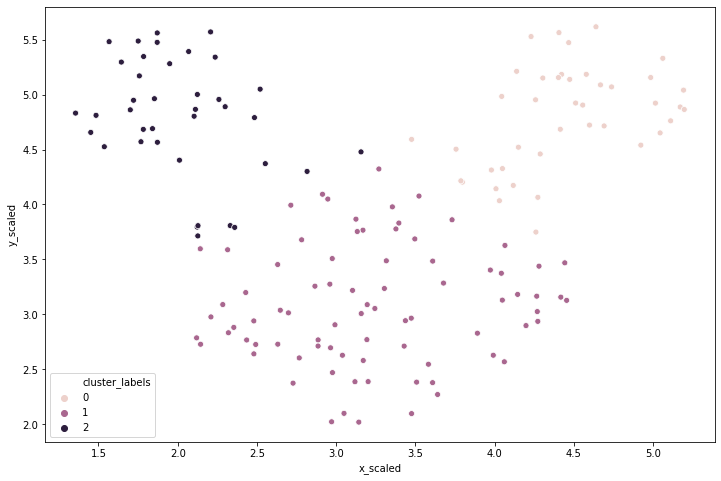

In [26]:
# Import the kmeans and vq functions
#from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']],cluster_centers)

fig=plt.figure(figsize=(12,8))
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

* defending: a number which signifies the defending attributes of a player
* physical: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.

In [28]:
# fifa_18_dataset.csv
fifa=pd.read_csv("fifa_18_sample_data.csv")
fifa.shape

(1000, 185)

In [32]:
fifa.iloc[249,0:1]

ID    188803
Name: 249, dtype: object

In [33]:
fifa=fifa.iloc[0:250]

In [36]:
fifa['scaled_def']=np.round(whiten(fifa['def']),2)
fifa['scaled_phy']=np.round(whiten(fifa['phy']),2)
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_def,scaled_phy
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,1.54,8.92
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,1.21,6.80
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,1.40,6.69
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,1.96,9.03
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,True,2.80,10.15


In [37]:
fifa.loc[248:249,'scaled_def']

248    3.83
249    2.20
Name: scaled_def, dtype: float64

* Initialize the random seed to the list [1000,2000].

In [38]:
# Set up a random seed in numpy
random.seed([1000,2000])

* Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.

In [39]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def','scaled_phy']],3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def','scaled_phy']],cluster_centers)

* Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [40]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 3.743839    8.867500
1                 1.865316    7.083038
2                 2.096780    8.944915


* Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.

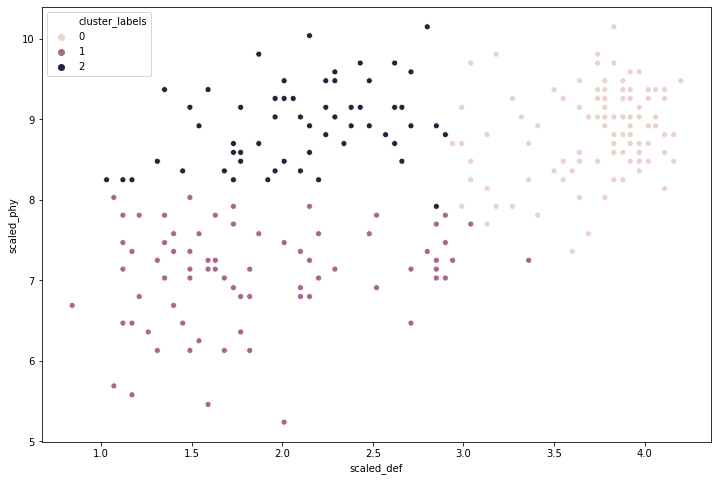

In [42]:
fig=plt.figure(figsize=(12,8))
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

* Notice that the seed has an impact on clustering as the data is uniformly distributed.